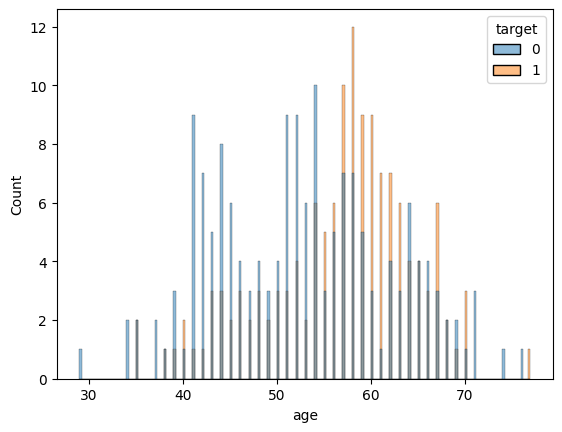

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Bài tập 1
df = pd.read_csv('cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())



sns.histplot(data = df, x = 'age', hue = 'target', binwidth = 0.25)

plt.show()

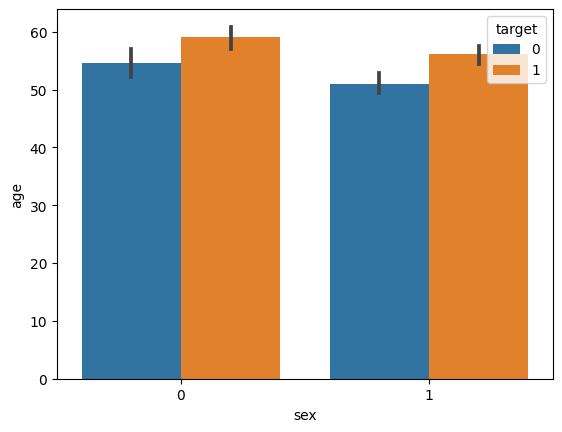

In [ ]:

sns.barplot(data = df, x = 'sex', y = 'age', hue = 'target')
plt.show()

In [ ]:
#bai tap 3
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto', leaf_size = 30, p =2, metric = 'minkowski')

classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, classifier.predict(X_train))
cm_test = confusion_matrix(y_test, classifier.predict(X_test))

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/ len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/ len(y_test), 2)
print('Accuracy for training set for KNN = {}'. format(accuracy_for_train))
print('Accuracy for testing set for KNN = {}'. format(accuracy_for_test))



Accuracy for training set for KNN = 0.89
Accuracy for testing set for KNN = 0.85


In [ ]:
#########################################   SVM   #############################################################

#Bai Tap 4


from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 42)
model2 = svm.fit(X_train, y_train)
cm_train = confusion_matrix(y_train, model2.predict(X_train))
cm_test = confusion_matrix(y_test, model2.predict(X_test))

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for SVC = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVC = {}'.format(accuracy_for_test))


Accuracy for training set for SVC = 0.9
Accuracy for test set for SVC = 0.89


In [ ]:
#########################################   Naive Bayes  #############################################################
# Bai tap 5


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
from sklearn.naive_bayes import GaussianNB as GNB
gnb = GNB()
model3 = gnb.fit(X_train, y_train)
cm_train = confusion_matrix(y_train, model3.predict(X_train))
cm_test = confusion_matrix(y_test, model3.predict(X_test))

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for GaussianNB = {}'.format(accuracy_for_train))
print('Accuracy for test set for GaussianNB = {}'.format(accuracy_for_test))



Accuracy for training set for GaussianNB = 0.85
Accuracy for test set for GaussianNB = 0.85


In [ ]:
#Bai tap 6

#########################################   Decision Tree  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 2)
model4 = tree.fit(X_train, y_train)
cm_train = confusion_matrix(y_train, model4.predict(X_train))
cm_test = confusion_matrix(y_test, model4.predict(X_test))

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for DecisionTreeClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for DecisionTreeClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for DecisionTreeClassifier = 1.0
Accuracy for test set for DecisionTreeClassifier = 0.75


In [ ]:
#########################################  Random Forest  #############################################################
#bai tap 7
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'gini', min_samples_split = 2, max_depth = 10, n_estimators = 2, random_state = 42)
model5 = forest.fit(X_train, y_train)
cm_train = confusion_matrix(y_train, model5.predict(X_train))
cm_test = confusion_matrix(y_test, model5.predict(X_test))

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for RandomForestClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for RandomForestClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for RandomForestClassifier = 0.92
Accuracy for test set for RandomForestClassifier = 0.75


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
X = df.iloc[:, :-1].values
y = df.iloc[:, -1]. values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)
ada = AdaBoostClassifier(n_estimators = 50, learning_rate = 1.)
model6 = ada.fit(X_train, y_train)
cm_train = confusion_matrix(y_train, model6.predict(X_train))
cm_test = confusion_matrix(y_test, model6.predict(X_test))

print(cm_train[0][0] + cm_train[1][1])
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round(((cm_test)[0][0] + cm_test[1][1]) / len(y_train), 2)
print('Accuracy for training set for AdaBoostClassifier = {}'. format(accuracy_for_train))
print('Accuracy for testing set for AdaBoostClassifier = {}'. format(accuracy_for_test))

221
Accuracy for training set for AdaBoostClassifier = 0.91
Accuracy for testing set for AdaBoostClassifier = 0.21


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
gradient = GradientBoostingClassifier(learning_rate = 1.0, n_estimators = 100, subsample = 1.0, min_samples_split= 2, max_depth = 3, random_state = 42)
model7 = gradient.fit(X_train, y_train)
cm_train = confusion_matrix(y_train, model7.predict(X_train))
cm_test = confusion_matrix(y_test, model7.predict(X_test))

print(cm_train[0][0] + cm_train[1][1])
print(cm_test[0][0], cm_test[1][1])
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for GradientBoost = {}'.format(accuracy_for_train))
print('Accuracy for testing set for GradientBoost = {}'.format(accuracy_for_test))

242
27 24
Accuracy for training set for GradientBoost = 1.0
Accuracy for testing set for GradientBoost = 0.84


In [ ]:
import xgboost as xgb
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

xgb = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 100, random_state = 42)
model8 = xgb.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, model8.predict(X_train))
cm_test = confusion_matrix(y_test, model8.predict(X_test))

print(cm_train[0][0] + cm_test[1][1])
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/ len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_train), 2)
print('Accuracy for training set for XGBoost = {}'. format(accuracy_for_train))
print('Accuracy for testing set for XGBoost = {}'. format(accuracy_for_test))

161
Accuracy for training set for XGBoost = 1.0
Accuracy for testing set for XGBoost = 0.21


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from xgboost import XGBClassifier
dtc = DecisionTreeClassifier(random_state = 42)
rdc = RandomForestClassifier(random_state = 42)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gb = GradientBoostingClassifier(random_state = 42)
svm = SVC(kernel = 'rbf', random_state = 42)
ada = AdaBoostClassifier(random_state = 42)

from sklearn.ensemble import StackingClassifier
base_models = [dtc,
               rdc,
               gb,
               knn,
               ada,
               svm]

meta_models = xgb

stacking = StackingClassifier(estimators = base_models, final_estimator = xgb, passthrough = True)



In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
last_model = stacking.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, last_model.predict(X_train))
cm_test = confusion_matrix(y_test, last_model.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/ len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for Stacking ={}'.format(accuracy_for_train))
print('Accuracy for testing set for Stacking = {}'. format(accuracy_for_test))

TypeError: ignored